In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd 'drive/My Drive/Colab Notebooks/ml_p6'

/content/drive/My Drive/Colab Notebooks/ml_p6


In [0]:
ls

bill_authentication.csv  MLCS344Sixth.ipynb  Social_Network_Ads.csv


# KNN

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv("Social_Network_Ads.csv")
df.head() 

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [0]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [0]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [0]:
X

,User ID,Gender,Age,EstimatedSalary
0,15624510,Male,19,19000
1,15810944,Male,35,20000
2,15668575,Female,26,43000
3,15603246,Female,27,57000
4,15804002,Male,19,76000
...,...,...,...,...
395,15691863,Female,46,41000
396,15706071,Male,51,23000
397,15654296,Female,50,20000
398,15755018,Male,36,33000


In [0]:
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [0]:
X.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary'], dtype='object')

In [0]:
X = X[['Gender', 'Age', 'EstimatedSalary']]
X

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [0]:
dummies = pd.get_dummies(X['Gender'])
dummies

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
395,1,0
396,0,1
397,1,0
398,0,1


In [0]:
X = X.merge(dummies,left_index=True, right_index=True)
X

,Gender,Age,EstimatedSalary,Female,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,1,0
3,Female,27,57000,1,0
4,Male,19,76000,0,1
...,...,...,...,...,...
395,Female,46,41000,1,0
396,Male,51,23000,0,1
397,Female,50,20000,1,0
398,Male,36,33000,0,1


In [0]:
X = X.drop(['Gender'], axis=1)
X

,Age,EstimatedSalary,Female,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


In [0]:
X = X.to_numpy()
y = y.to_numpy()
y=y.ravel()

In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [0]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics 

for n in range(2,11):
  knn = KNeighborsClassifier(n_neighbors=n)
  knn.fit(X_train, y_train) 
  y_pred = knn.predict(X_test)
  print("\n\nAccuracy of KNN with ",n,"Neighbours: ",metrics.accuracy_score(y_test, y_pred))



Accuracy of KNN with  2 Neighbours:  0.8375


Accuracy of KNN with  3 Neighbours:  0.8


Accuracy of KNN with  4 Neighbours:  0.825


Accuracy of KNN with  5 Neighbours:  0.8


Accuracy of KNN with  6 Neighbours:  0.8375


Accuracy of KNN with  7 Neighbours:  0.85


Accuracy of KNN with  8 Neighbours:  0.85


Accuracy of KNN with  9 Neighbours:  0.8375


Accuracy of KNN with  10 Neighbours:  0.8375


#SVM

In [0]:
from sklearn.svm import SVC

svclassifier=SVC(kernel='linear')

In [0]:
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred=svclassifier.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[54  5]
 [ 4 17]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        59
           1       0.77      0.81      0.79        21

    accuracy                           0.89        80
   macro avg       0.85      0.86      0.86        80
weighted avg       0.89      0.89      0.89        80



In [0]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [0]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])



```
# This is formatted as code
```

### Trying out Polynomial SVM Kernels. But for simple datasets, Linear Decision Boundary is the best

In [0]:
svclassifier=SVC(kernel='poly', degree=4, max_iter=500, verbose=True)
svclassifier.fit(X_train, y_train)
y_pred=svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[LibSVM][[13 46]
 [14  7]]
              precision    recall  f1-score   support

           0       0.48      0.22      0.30        59
           1       0.13      0.33      0.19        21

    accuracy                           0.25        80
   macro avg       0.31      0.28      0.25        80
weighted avg       0.39      0.25      0.27        80



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [0]:
svclassifier=SVC(kernel='sigmoid', verbose=True)
svclassifier.fit(X_train, y_train)
y_pred=svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[LibSVM][[59  0]
 [21  0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        59
           1       0.00      0.00      0.00        21

    accuracy                           0.74        80
   macro avg       0.37      0.50      0.42        80
weighted avg       0.54      0.74      0.63        80



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [0]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [0]:
svclassifier=SVC(kernel='rbf')
svclassifier.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred=svclassifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[58  1]
 [20  1]]
              precision    recall  f1-score   support

           0       0.74      0.98      0.85        59
           1       0.50      0.05      0.09        21

    accuracy                           0.74        80
   macro avg       0.62      0.52      0.47        80
weighted avg       0.68      0.74      0.65        80



In [0]:
y_test

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1])

In [0]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#Naive Bayes

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[54  5]
 [ 1 20]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        59
           1       0.80      0.95      0.87        21

    accuracy                           0.93        80
   macro avg       0.89      0.93      0.91        80
weighted avg       0.93      0.93      0.93        80



# Pretty Good!

In [0]:
import seaborn as sns

df_cm = pd.DataFrame(confusion_matrix(y_test,y_pred), index=['Actual +', 'Actual -'], columns=['Predicted +', 'Predicted -'])
df_cm

,Predicted +,Predicted -
Actual +,54,5
Actual -,1,20


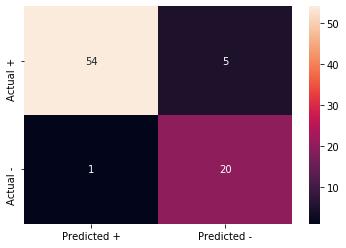

In [0]:
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

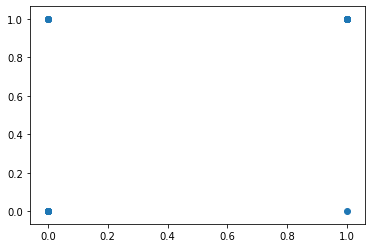

In [0]:
plt.scatter(y_test, y_pred)
plt.show()

# Useless Scatter Plot! 😂